#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


pd.set_option("display.max_columns", None)


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Datos cargados correctamente")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Datos cargados correctamente
Train shape: (1460, 81)
Test shape: (1459, 80)



--- Informacion general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

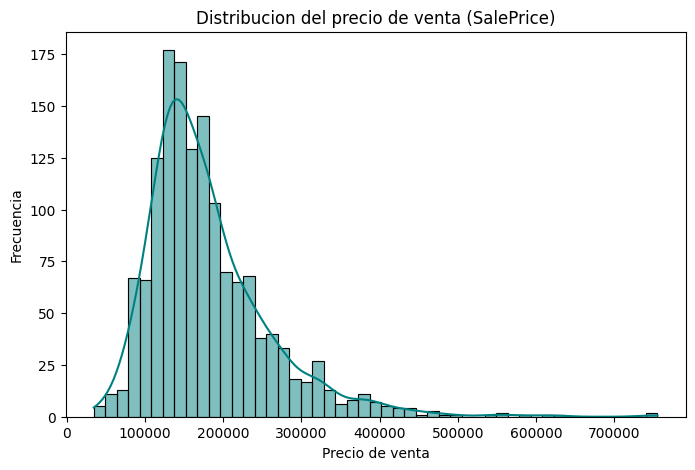

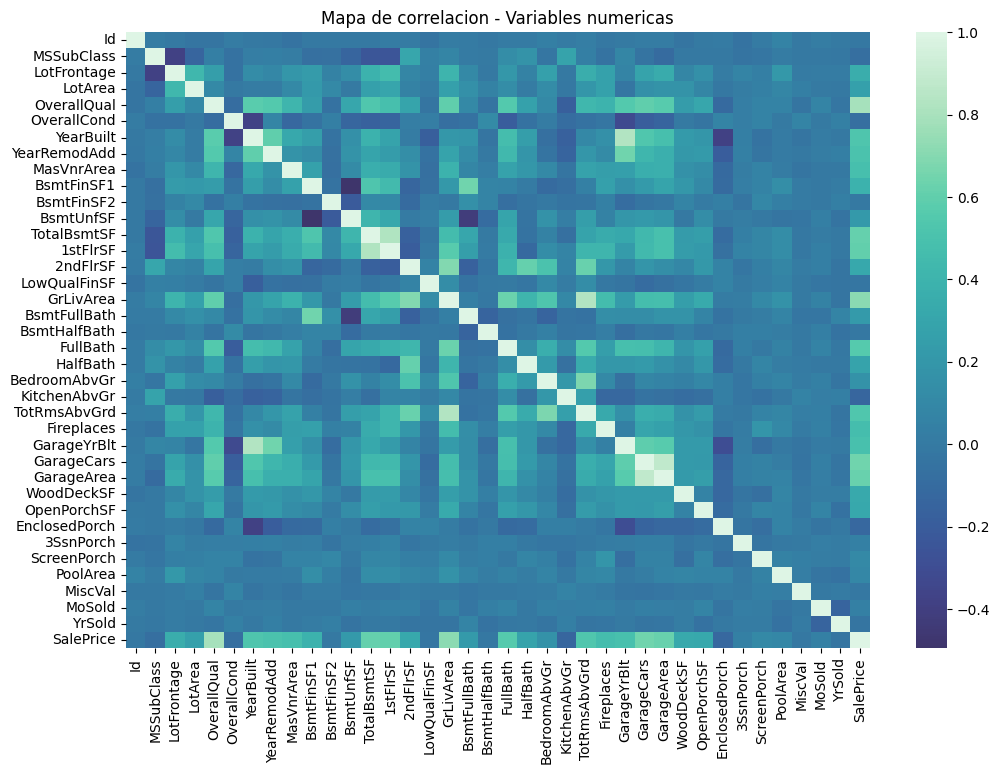

In [10]:

print("\n--- Informacion general ---")
print(train.info())

print("\n--- Valores faltantes más comunes ---")
missing = train.isnull().sum().sort_values(ascending=False)
print(missing.head(10))


plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], kde=True, color="teal")
plt.title("Distribucion del precio de venta (SalePrice)")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(12,8))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, cmap="mako", center=0)
plt.title("Mapa de correlacion - Variables numericas")
plt.show()


In [11]:

train_clean = train.copy()
test_clean = test.copy()


limite = len(train_clean) * 0.3
cols_out = train_clean.columns[train_clean.isnull().sum() > limite]
train_clean.drop(columns=cols_out, inplace=True)
test_clean.drop(columns=cols_out, inplace=True)


for col in train_clean.select_dtypes(include=['float64', 'int64']).columns:
    if col == "SalePrice":
        continue
    mediana = train_clean[col].median()
    train_clean[col].fillna(mediana, inplace=True)
    if col in test_clean.columns:
        test_clean[col].fillna(mediana, inplace=True)

for col in train_clean.select_dtypes(include=['object']).columns:
    moda = train_clean[col].mode()[0] if not train_clean[col].mode().empty else "Desconocido"
    train_clean[col].fillna(moda, inplace=True)
    if col in test_clean.columns:
        test_clean[col].fillna(moda, inplace=True)

print("Limpieza de datos completada")


Limpieza de datos completada


C:\Users\MJ232\AppData\Local\Temp\ipykernel_5704\4224921762.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(mediana, inplace=True)
C:\Users\MJ232\AppData\Local\Temp\ipykernel_5704\4224921762.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:

train_clean = train_clean[train_clean["GrLivArea"] < 4000]


for df in [train_clean, test_clean]:
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    df["EdadCasa"] = df["YrSold"] - df["YearBuilt"]
    df["EdadRemodel"] = df["YrSold"] - df["YearRemodAdd"]
    df["TieneGarage"] = (df["GarageArea"] > 0).astype(int)

print("Preparacion de variables para el analisis estadistico y la creacion de graficos")


y = np.log1p(train_clean["SalePrice"])  
X = train_clean.drop(columns=["SalePrice"])


X_full = pd.get_dummies(X, drop_first=True)
test_full = pd.get_dummies(test_clean, drop_first=True)


X_full, test_full = X_full.align(test_full, join="left", axis=1, fill_value=0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
test_scaled = scaler.transform(test_full)


Preparacion de variables para el analisis estadistico


In [22]:

modelo = Ridge(alpha=10)
modelo.fit(X_scaled, y)


y_pred = modelo.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n--- Resultados del modelo ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")





--- Resultados del modelo ---
RMSE: 0.0925
MAE: 0.0656
R²: 0.9455


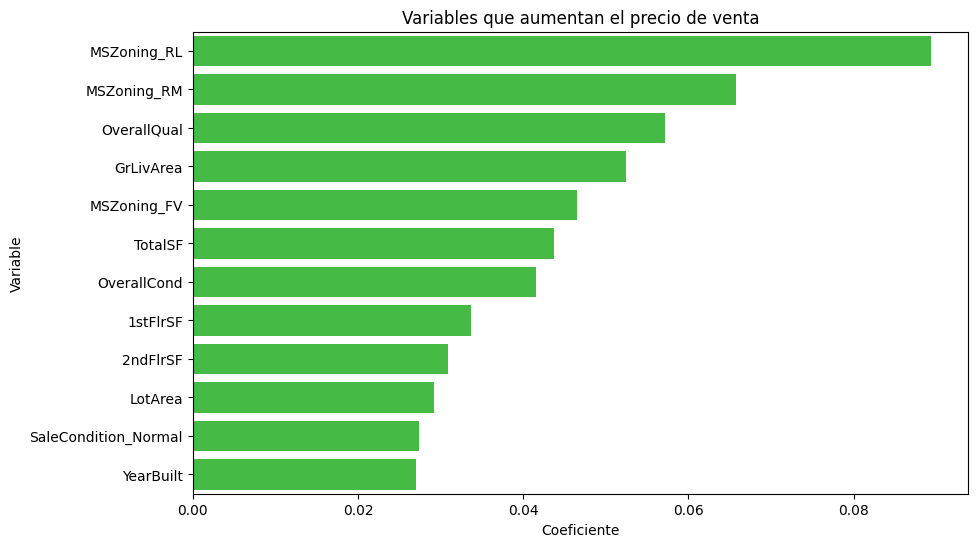

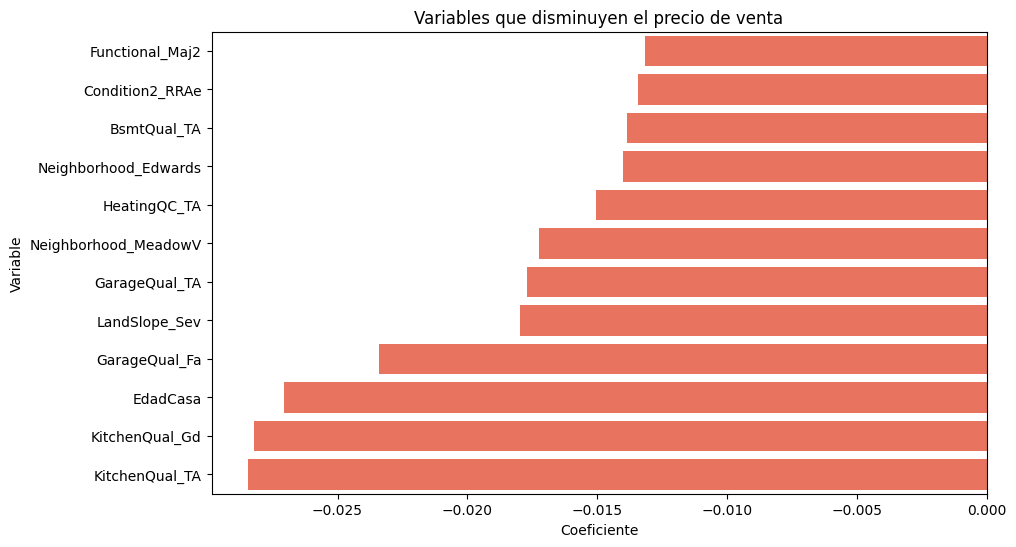

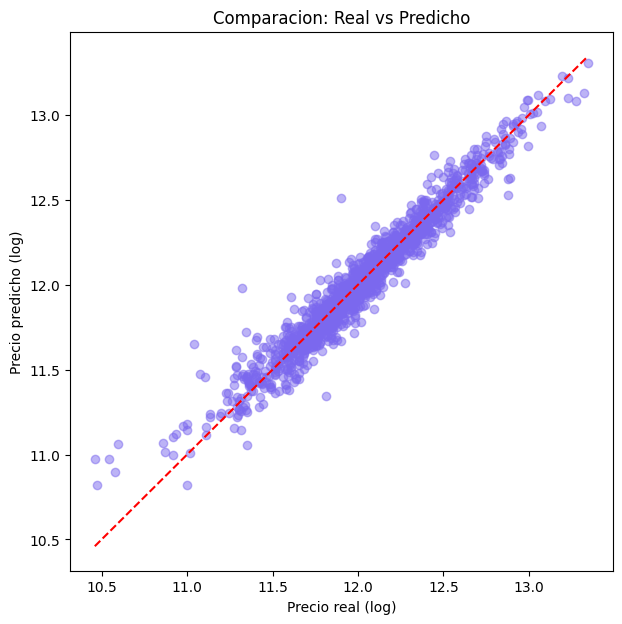

In [19]:

coef_df = pd.DataFrame({
    "Variable": X_full.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(12), x="Coeficiente", y="Variable", color="limegreen")
plt.title("Variables que aumentan el precio de venta")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.tail(12), x="Coeficiente", y="Variable", color="tomato")
plt.title("Variables que disminuyen el precio de venta")
plt.show()


plt.figure(figsize=(7,7))
plt.scatter(y, y_pred, alpha=0.5, color="mediumslateblue")
plt.xlabel("Precio real (log)")
plt.ylabel("Precio predicho (log)")
plt.title("Comparacion: Real vs Predicho")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()




In [15]:

pred_final = np.expm1(modelo.predict(test_scaled))


resultado = pd.DataFrame({
    "Id": test_clean["Id"],
    "SalePrice": pred_final
})

resultado.to_csv("predicciones.csv", index=False)
print("Archivo 'predicciones.csv' generado correctamente")
print(resultado.head())


Archivo 'predicciones.csv' generado correctamente
     Id      SalePrice
0  1461  111464.885640
1  1462  147162.852132
2  1463  172582.202933
3  1464  187864.181158
4  1465  184759.966129
